In [135]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score


In [136]:
dt_house = pd.read_csv('./price_house_train.csv').fillna(0)
dt_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


In [137]:
mcor = dt_house.corr(numeric_only= True)
mcor = mcor.round(4)
mcor.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0000,0.0112,-0.0198,-0.0332,-0.0284,0.0126,-0.0127,-0.0220,-0.0511,-0.0050,...,-0.0296,-0.0005,0.0029,-0.0466,0.0013,0.0570,-0.0062,0.0212,0.0007,-0.0219
MSSubClass,0.0112,1.0000,-0.2150,-0.1398,0.0326,-0.0593,0.0279,0.0406,0.0236,-0.0698,...,-0.0126,-0.0061,-0.0120,-0.0438,-0.0260,0.0083,-0.0077,-0.0136,-0.0214,-0.0843
LotFrontage,-0.0198,-0.2150,1.0000,0.1007,0.1766,-0.0535,0.0369,0.0787,0.1050,0.0767,...,-0.0168,0.0696,0.0274,0.0235,0.0230,0.1141,-0.0596,0.0189,-0.0121,0.2096
LotArea,-0.0332,-0.1398,0.1007,1.0000,0.1058,-0.0056,0.0142,0.0138,0.1033,0.2141,...,0.1717,0.0848,-0.0183,0.0204,0.0432,0.0777,0.0381,0.0012,-0.0143,0.2638
OverallQual,-0.0284,0.0326,0.1766,0.1058,1.0000,-0.0919,0.5723,0.5507,0.4073,0.2397,...,0.2389,0.3088,-0.1139,0.0304,0.0649,0.0652,-0.0314,0.0708,-0.0273,0.7910


In [138]:
def _show_heastmap(dtframe):
    sb.set(rc={'figure.figsize': (15,12)})
    mcplot = sb.heatmap(dtframe,cmap="Reds", annot=False, linewidths=0.8, annot_kws={"size":7})

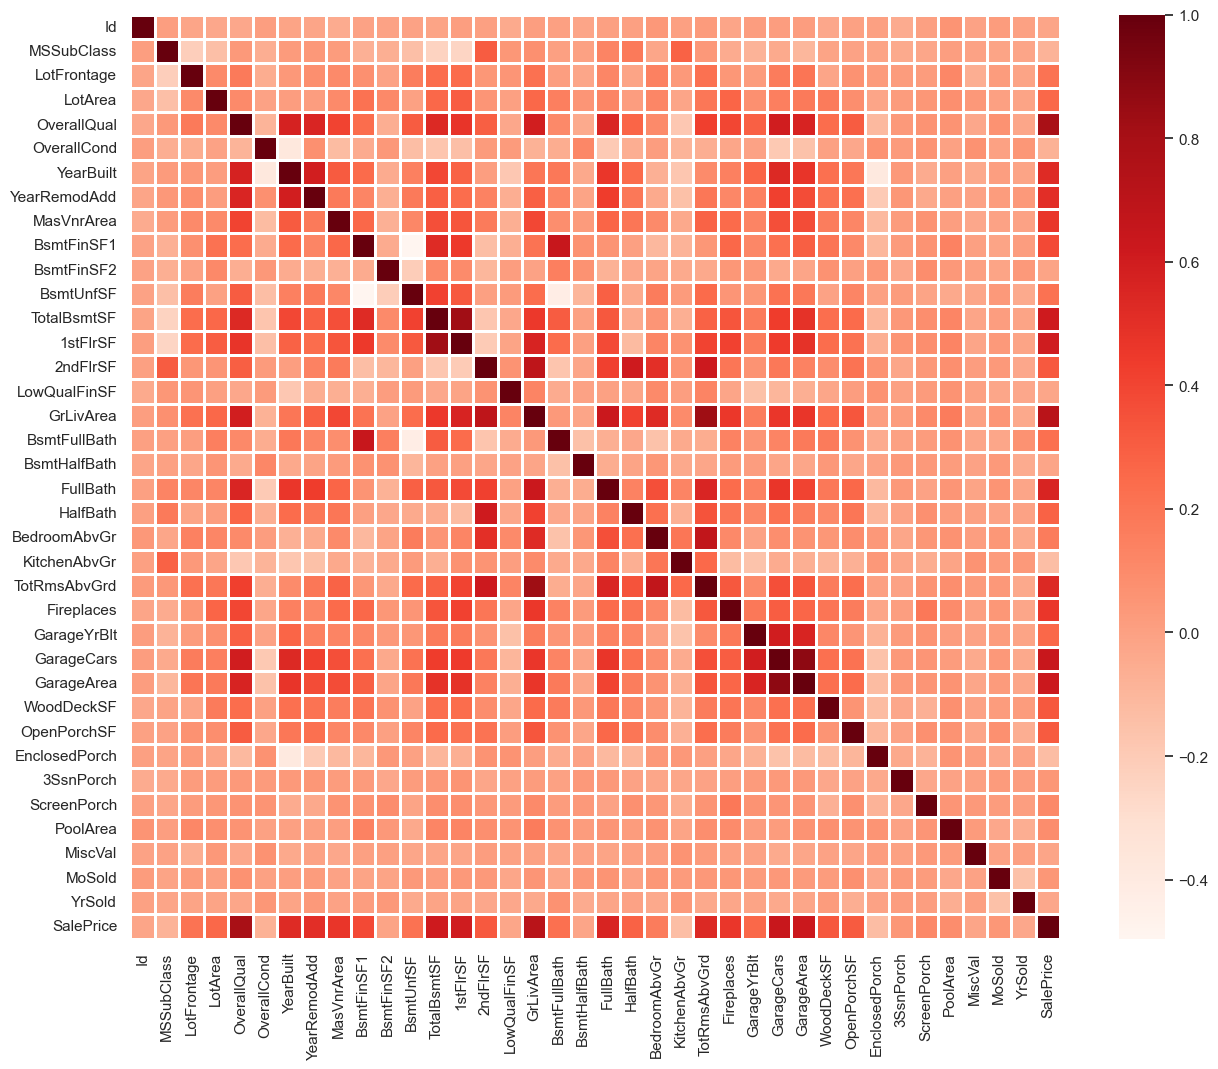

In [139]:
_show_heastmap(mcor)

In [140]:
sc_dfa = StandardScaler()
campos =dt_house[['SalePrice','GarageArea']]
print('Total Row : ', len(campos))
dfa_std = sc_dfa.fit_transform(campos.astype(float))
dfa_std


Total Row :  1460


array([[ 0.34727322,  0.35100032],
       [ 0.00728832, -0.06073101],
       [ 0.53615372,  0.63172623],
       ...,
       [ 1.07761115, -1.03391416],
       [-0.48852299, -1.09005935],
       [-0.42084081, -0.9216238 ]])

c:\Users\kenlu\Documents\Ciencia de datos\data_science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kenlu\Documents\Ciencia de datos\data_science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 2 El promedio de silhouette_score es : 0.47832851011139316
Para n_clusters = 3 El promedio de silhouette_score es : 0.43462310738433885


c:\Users\kenlu\Documents\Ciencia de datos\data_science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kenlu\Documents\Ciencia de datos\data_science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 4 El promedio de silhouette_score es : 0.40360473718445156
Para n_clusters = 5 El promedio de silhouette_score es : 0.37552203170834736


c:\Users\kenlu\Documents\Ciencia de datos\data_science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 6 El promedio de silhouette_score es : 0.4017279124687596


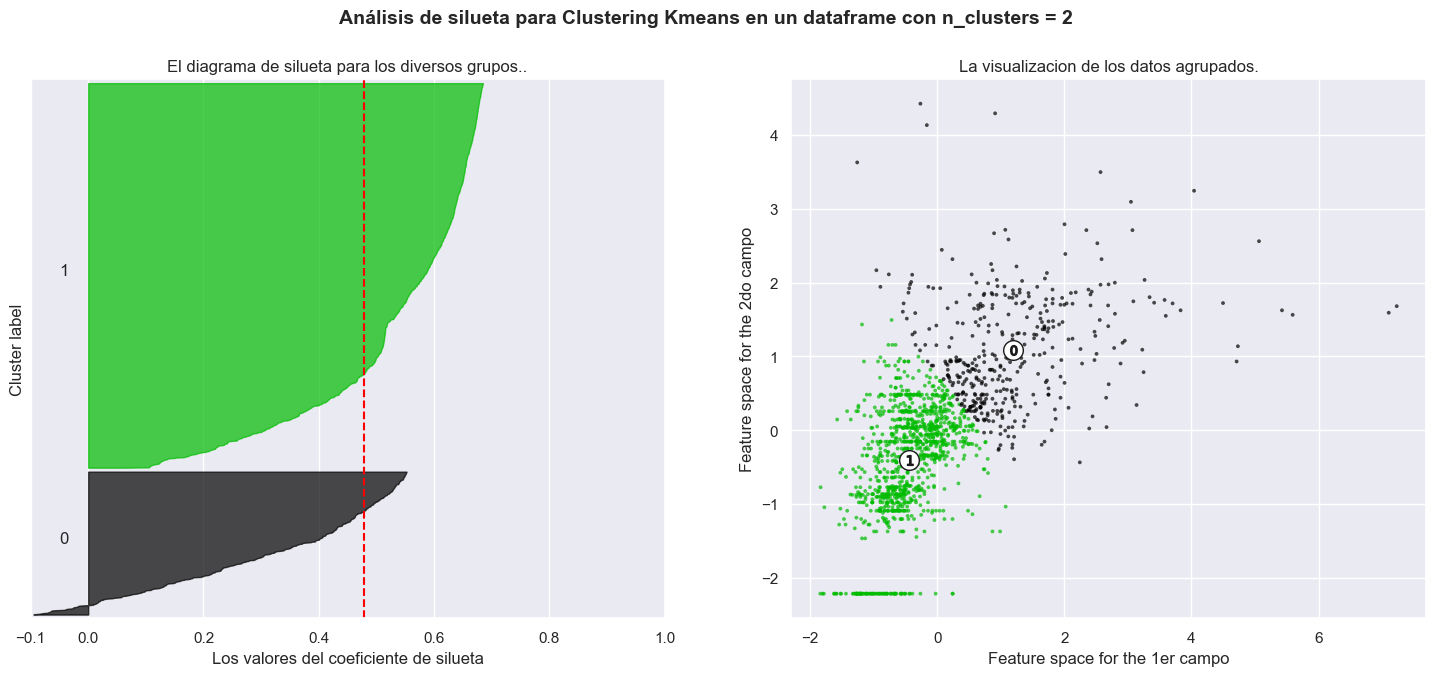

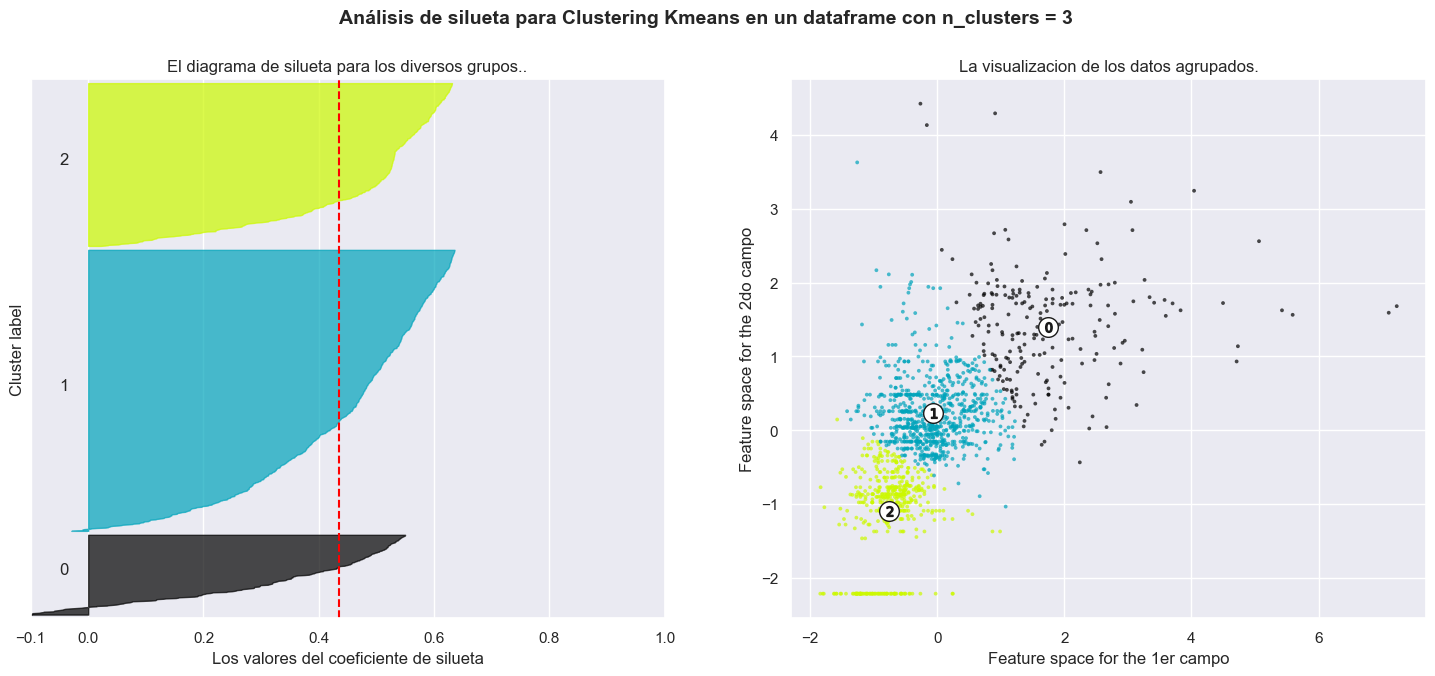

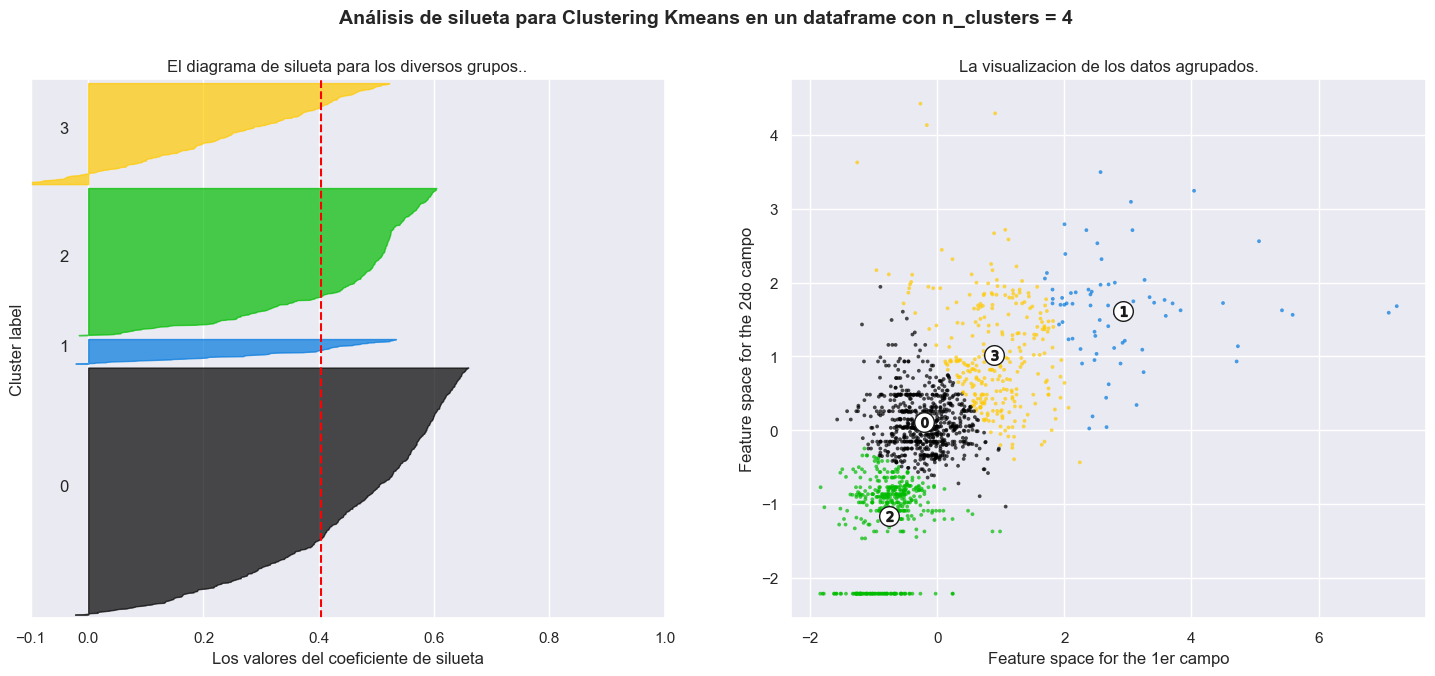

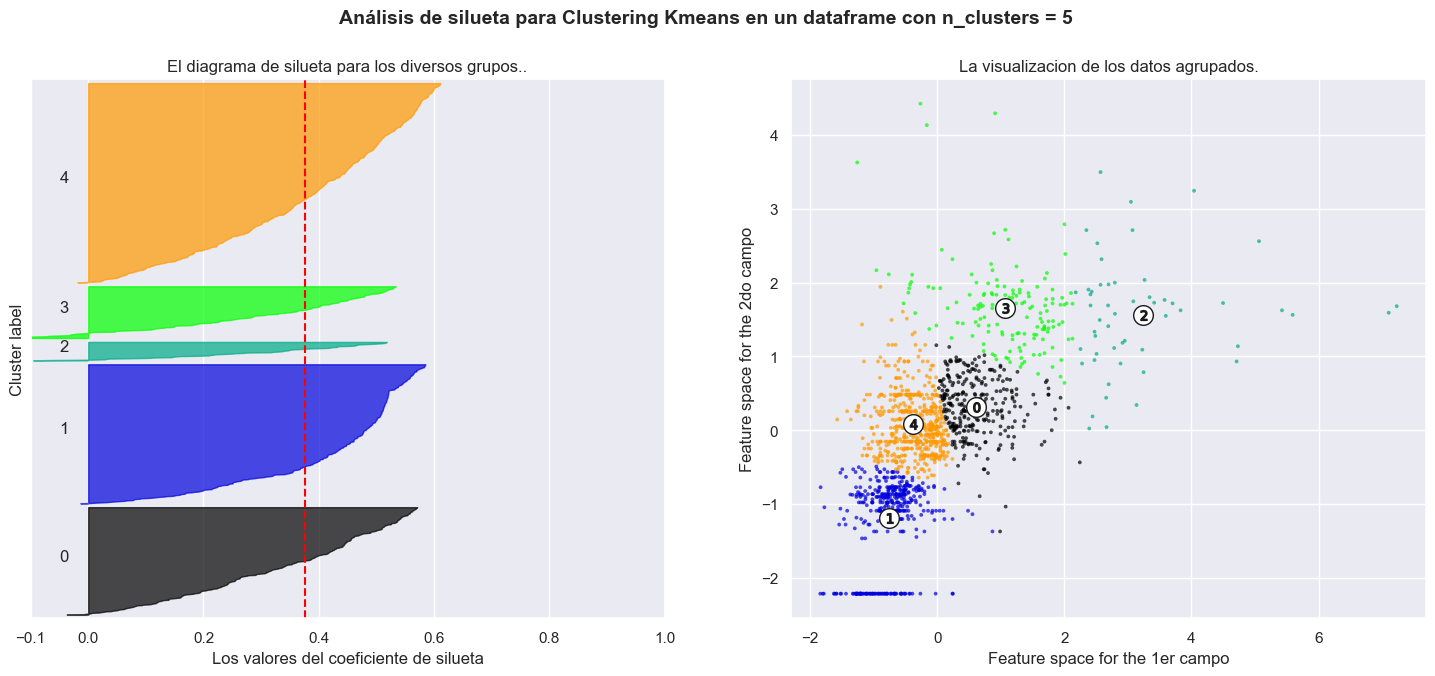

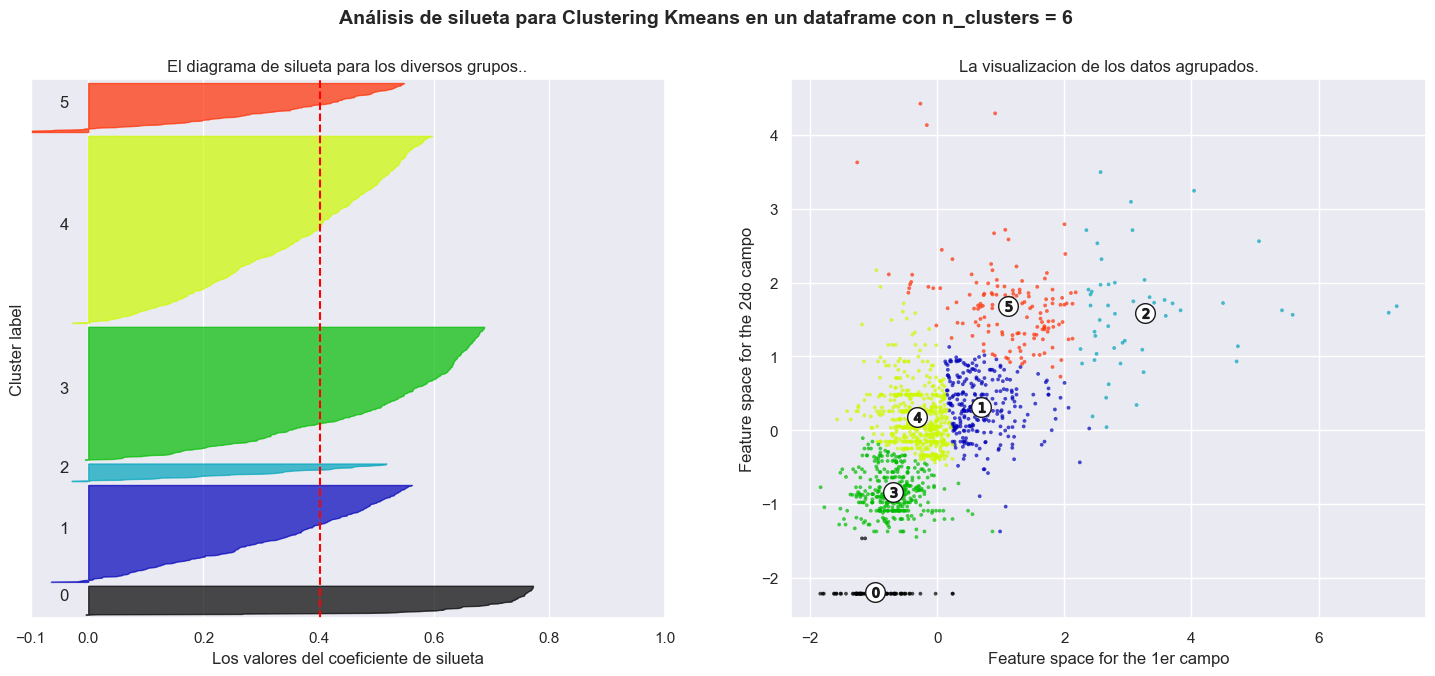

In [141]:
# Analisis de silueta
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dfa_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dfa_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfa_std, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "El promedio de silhouette_score es :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfa_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("El diagrama de silueta para los diversos grupos..")
    ax1.set_xlabel("Los valores del coeficiente de silueta")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dfa_std[:, 0], dfa_std[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("La visualizacion de los datos agrupados.")
    ax2.set_xlabel("Feature space for the 1er campo")
    ax2.set_ylabel("Feature space for the 2do campo")

    plt.suptitle(
        "Análisis de silueta para Clustering Kmeans en un dataframe con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

c:\Users\kenlu\Documents\Ciencia de datos\data_science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


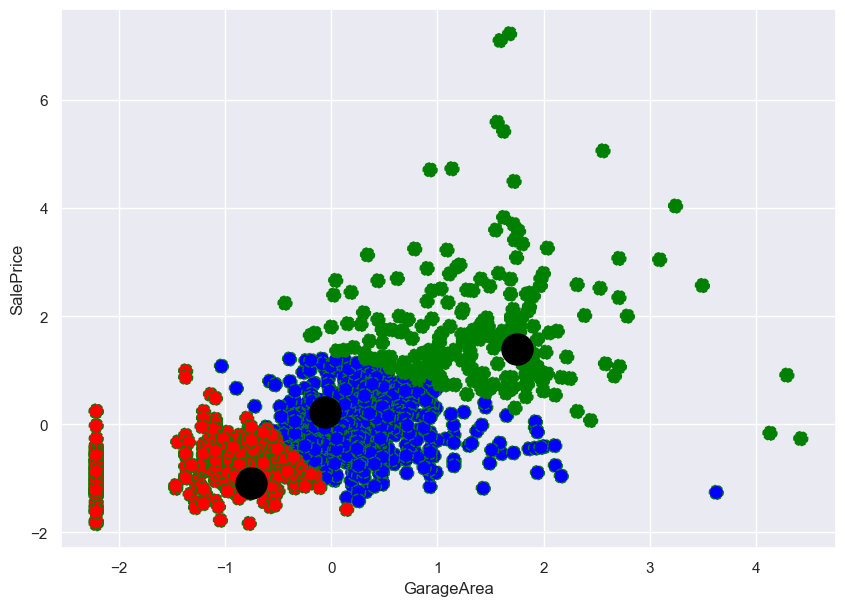

In [142]:
## Clustering with KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(dfa_std)
labels = kmeans.labels_
new_dfa = pd.DataFrame(data = dfa_std, columns = ['SalePrice','GarageArea'])
new_dfa['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(new_dfa["GarageArea"][new_dfa["label_kmeans"] == 0], new_dfa["SalePrice"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["GarageArea"][new_dfa["label_kmeans"] == 1], new_dfa["SalePrice"][new_dfa["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["GarageArea"][new_dfa["label_kmeans"] == 2], new_dfa["SalePrice"][new_dfa["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["GarageArea"][new_dfa["label_kmeans"] == 3], new_dfa["SalePrice"][new_dfa["label_kmeans"] == 3], 
            color = "yellow", s=100, edgecolor='green',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
ax.set_xlabel('GarageArea')
ax.set_ylabel('SalePrice')
plt.show()

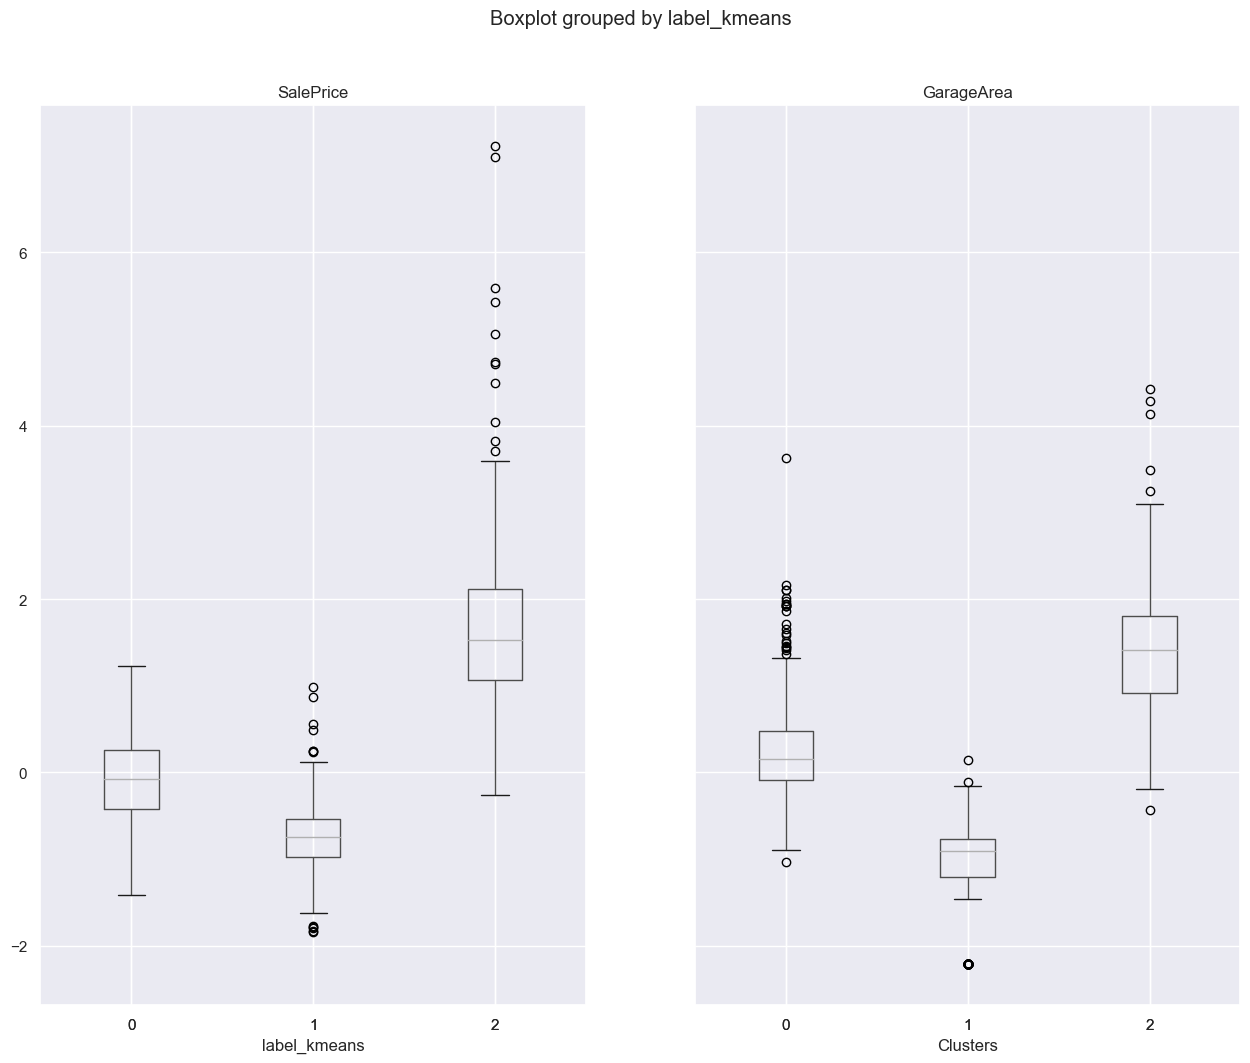

In [143]:

new_dfa.boxplot(column=['SalePrice','GarageArea'], by='label_kmeans')
plt.xlabel("Clusters")
plt.ylabel("Valor de SalePrice")
plt.show()